In [1]:
import biotite
import biotite.structure as struc
import biotite.structure.io as strucio
import biotite.structure.io.xtc as xtc
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as M

In [2]:
def rmsf(filePath,pdb_name,colorList,temperatureList):
    figure = plt.figure(figsize=(24, 6))
    avg_datas = []
    for temperature in temperatureList:
        rmsf_values = []
        for i in range(1, 4):
            template = strucio.load_structure(filePath + pdb_name + "/" + pdb_name + ".pdb")
            protein_mask = struc.filter_amino_acids(template)
            template = template[protein_mask]
            xtc_file = xtc.XTCFile.read(filePath + pdb_name + "/" + temperature + "/md" + str(i) + ".xtc",
                                        atom_i=np.where(protein_mask)[0])
            print(filePath + pdb_name + "/" + temperature + "/md" + str(i) + ".xtc")
            trajectory = xtc_file.get_structure(template)
            trajectory = struc.remove_pbc(trajectory)
            trajectory, transform = struc.superimpose(trajectory[0], trajectory)
            ca_trajectory = trajectory[:, trajectory.atom_name == "CA"]
            rmsf_value = struc.rmsf(struc.average(ca_trajectory), ca_trajectory)
            rmsf_values.append(rmsf_value)
            print(len(rmsf_values))
        avg_datas.append(np.mean(rmsf_values, axis=0))
        save_data(avg_datas, pdb_name)
    rmsf_align(avg_datas,pdb_name,colorList)

In [3]:
M1_index = [[17, 23], [34, 45], [47, 51], [71, 84], [87, 95], [112, 130], [134, 142], [162, 175], [179, 185],[195, 211],
            [217, 221], [232, 245], [249, 261], [265, 285], [288, 294], [324, 335]]
M1_text = ["β1", "α1", "β2", "α2", "β3", "α3", "β4", "α4", "β5", "α5", "β6", "α6", "β7", "α7", "β8", "α8"]
save_path = "C:/Users/17351/Desktop/protein_fram/G11/Figs/rmsf/"

def rmsf_align(rmsf_values, pdb_name, colorList):
    file_path = "C:/Users/17351/Desktop/"+ pdb_name +"_seq.txt"
    print(file_path)
    f = open(file_path)
    line = f.readline()
    align_300, align_350, align_400 = [], [], []
    i = 0
    for c in line:
        if c == '-':
            align_300.append(None)
            align_350.append(None)
            align_400.append(None)
        else:
            align_300.append(rmsf_values[0][i])
            align_350.append(rmsf_values[1][i])
            align_400.append(rmsf_values[2][i])
            i += 1
    f.close()
#     print(align_300)

    plt.plot(align_300, color=colorList[0], linewidth=2, label="300 K")
    plt.plot(align_350, color=colorList[1], linewidth=2, label="350 K")
    plt.plot(align_400, color=colorList[2], linewidth=2, label="400 K")
    
    plt.ylim(0, 10)
    plt.xlim(0, 336)
    plt.xticks(range(0, 336, 25), fontsize=18, fontweight="bold")
    plt.yticks(fontsize=18, fontweight="bold")
    plt.xlabel('Residue index', family='Times New Roman', weight='bold', fontsize=22)
    plt.ylabel('RMSF (Å)', family='Times New Roman', weight='bold', fontsize=22)
    plt.legend(ncol=3, loc=1,prop={'size': 18})

    for i in range(len(M1_text)):
        plt.text((M1_index[i][0] + M1_index[i][1]) / 2 - 1.5, 7.5, M1_text[i],
                 family='times new roman', fontsize=20, style='italic', weight='bold')
        plt.fill_between(range(M1_index[i][0], M1_index[i][1]), -0.001, 10, color='gainsboro')
    plt.savefig(save_path + pdb_name +".png",format='png',dpi=600)
    plt.show()

In [4]:
def save_data(datas, pdb_name):
    file_path = "C:/Users/17351/Desktop/protein_fram/G11/Figs/rmsf/" + pdb_name + "_RMSF.txt"
    f = open(file_path,'w')
    for data in datas:
        line = ""
        for value in data:
            line += str(value) + " "
        line += "\n"
        f.write(line)
    f.close()

def read_data(pdb_name):
    file_path = "C:/Users/17351/Desktop/protein_fram/G11/Figs/rmsf/" + pdb_name + "_RMSF.txt"
    f = open(file_path,'r')
    line = f.readline()
    datas = []
    while line:
        line = line.split(" ")
        line = line[0:len(line)-1]
        data = []
        for value in line:
            data.append(float(value))
        datas.append(data)
        line = f.readline()
    f.close()
    return datas

C:/Users/17351/Downloads/md/TY1/300k/md1.xtc
1
C:/Users/17351/Downloads/md/TY1/300k/md2.xtc
2
C:/Users/17351/Downloads/md/TY1/300k/md3.xtc
3
C:/Users/17351/Downloads/md/TY1/350k/md1.xtc
1
C:/Users/17351/Downloads/md/TY1/350k/md2.xtc
2
C:/Users/17351/Downloads/md/TY1/350k/md3.xtc
3
C:/Users/17351/Downloads/md/TY1/400k/md1.xtc
1
C:/Users/17351/Downloads/md/TY1/400k/md2.xtc
2
C:/Users/17351/Downloads/md/TY1/400k/md3.xtc
3
C:/Users/17351/Desktop/TY1_seq.txt


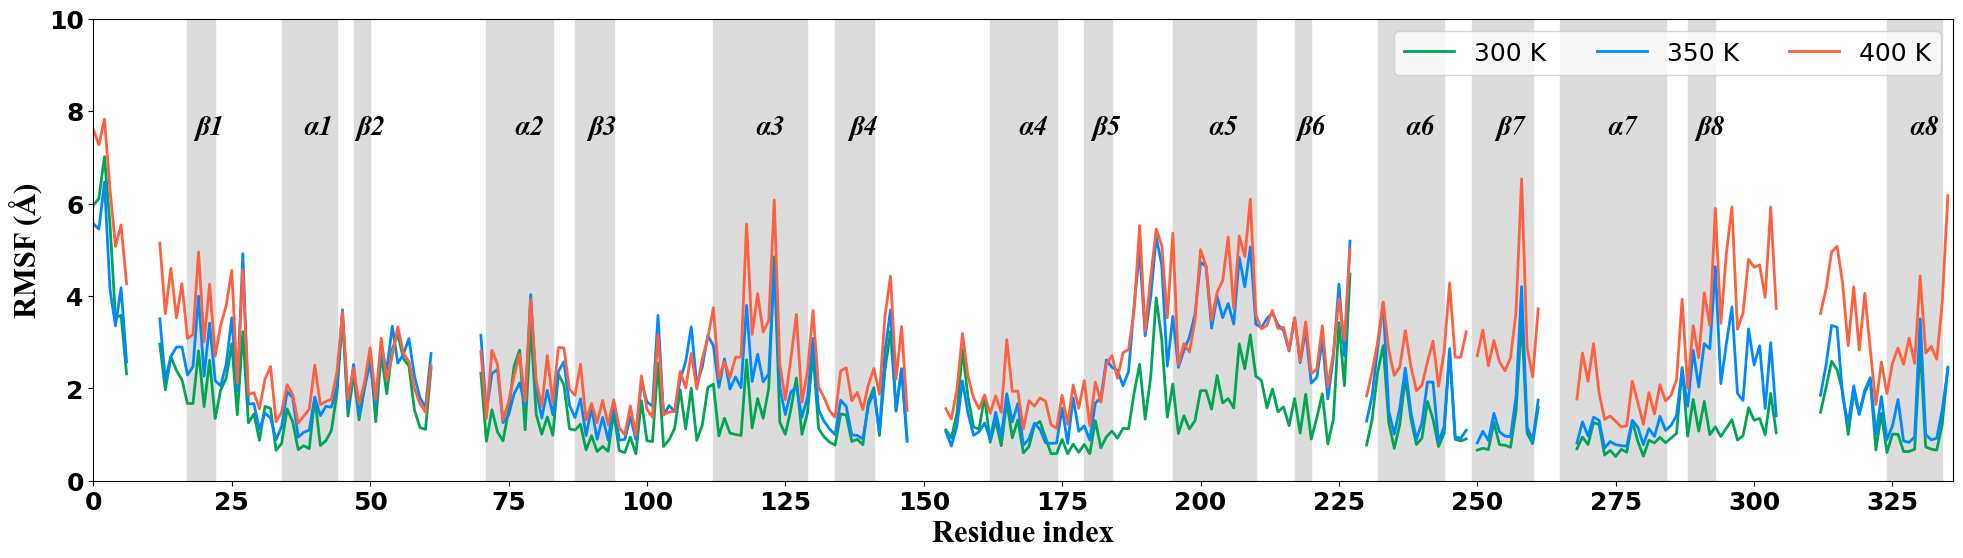

In [6]:
filePath = "C:/Users/17351/Downloads/md/"
temperatureList = ["300k", "350k", "400k"]
colorList = ["#00A654","#0089FF","#FF6040"]
pdb_name = "TY1"
rmsf(filePath,pdb_name,colorList,temperatureList)

# datas = [[1,2,3],[1,2,4],[1,2,5]]
# save_data(datas, pdb_name)
# rdatas = read_data(pdb_name)
# print(rdatas)
# print(np.mean(rdatas[0]),np.mean(rdatas[1]),np.mean(rdatas[2]))

<function rmsf at 0x000002073E2A5C10>
